<a href="https://colab.research.google.com/github/HARSHINI20/-TechnoHacks-EduTech-/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [ ]:
# List all the files in the input directory
!ls -GFlash --color ..//content/creditcard.csv

6.0M -rw-r--r-- 1 root 6.0M Feb 19 17:43 ..//content/creditcard.csv


In [ ]:
# Transaction CSVs
train_transaction = pd.read_csv('/content/creditcard.csv')
test_transaction = pd.read_csv('/content/creditcard.csv')
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv('/content/creditcard.csv')
test_identity = pd.read_csv('/content/creditcard.csv')
# Sample Submissions
ss = pd.read_csv('/content/creditcard.csv')
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (11945, 31)
test_transaction shape is (11945, 31)
train_identity shape is (11945, 31)
test_identity shape is (11945, 31)


In [ ]:
data_df = pd.read_csv("//content/creditcard.csv")

In [ ]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 11945  columns: 31


In [ ]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11945.000000,11945.000000,11945.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,...,11943.000000,11943.000000,11942.000000,11942.000000,11942.000000,11942.000000,11942.000000,11942.000000,11942.000000,11942.000000
mean,10484.969025,-0.212084,0.198098,0.868208,0.216751,-0.082695,0.117665,-0.074443,-0.043792,0.626851,...,-0.042238,-0.138773,-0.037143,0.015065,0.097321,0.086130,0.007024,0.001701,68.764688,0.003182
std,10988.514925,1.576848,1.399371,1.149635,1.425972,1.222732,1.299996,1.083829,1.193876,1.194679,...,0.862604,0.626481,0.523051,0.596136,0.430639,0.550554,0.402569,0.292847,206.113743,0.056322
min,0.000000,-27.670569,-38.694338,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-3.083184,-1.338556,-7.976100,-8.424041,0.000000,0.000000
25%,2537.000000,-0.987472,-0.295846,0.360590,-0.681321,-0.683632,-0.630757,-0.549907,-0.178699,-0.172057,...,-0.258128,-0.533574,-0.174299,-0.326372,-0.151495,-0.335736,-0.080506,-0.014253,5.630000,0.000000
50%,6644.000000,-0.339206,0.222339,0.896405,0.201183,-0.175286,-0.157920,-0.061010,0.020501,0.629636,...,-0.104902,-0.123874,-0.047860,0.072768,0.134541,0.018564,-0.000786,0.016791,16.180000,0.000000
75%,12346.000000,1.157833,0.855957,1.556413,1.089800,0.352405,0.480652,0.462911,0.278282,1.402506,...,0.050503,0.257530,0.082052,0.405991,0.367825,0.422341,0.106580,0.076354,55.000000,0.000000
max,33787.000000,1.960497,8.636214,4.101716,13.143668,34.099309,21.393069,34.303177,8.218160,10.392889,...,22.588989,4.534454,13.876221,4.014444,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,Amount,V28,V27,V26,V25,V24,V23,V22,V21,...,V9,V8,V7,V6,V5,V4,V3,V1,V2,Time
Total,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
Percent,0.025115,0.025115,0.025115,0.025115,0.025115,0.025115,0.025115,0.025115,0.016743,0.016743,...,0.008372,0.008372,0.008372,0.008372,0.008372,0.008372,0.008372,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Random over-sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Random under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after Random Over-Sampling:", pd.Series(y_ros).value_counts())
print("Class distribution after Random Under-Sampling:", pd.Series(y_rus).value_counts())

Class distribution after Random Over-Sampling: 0.0    1
1.0    1
Name: Class, dtype: int64
Class distribution after Random Under-Sampling: 0.0    1
1.0    1
Name: Class, dtype: int64


In [ ]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0.0,0.0,7712.43,3960,256531.16,64.780596,12.990,45627.208851
1,0.0,1.0,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0.0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1.0,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0.0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [ ]:
df = pd.read_csv('/content/creditcard.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               Time            V1            V2            V3            V4  \
count  11945.000000  11945.000000  11945.000000  11944.000000  11944.000000   
mean   10484.969025     -0.212084      0.198098      0.868208      0.216751   
std    10988.514925      1.576848      1.399371      1.149635      1.425972   
min        0.000000    -27.670569    -38.694338    -15.496222     -4.657545   
25%     2537.000000     -0.987472     -0.295846      0.360590     -0.681321   
50%     6644.000000     -0.339206      0.222339      0.896405      0.201183   
75%    12346.000000      1.157833      0.855957      1.556413      1.089800   
max    33787.000000      1.960497      8.636214      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  11944.000000  11944.000000  11944.000000  11944.000000  11944.000000   
mean      -0.082695      0.117665     -0.074443     -0.043792      0.626851   
std        1.222732      1.299

In [ ]:
# Data types of each column
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       2
V21       2
V22       2
V23       3
V24       3
V25       3
V26       3
V27       3
V28       3
Amount    3
Class     3
dtype: int64


In [ ]:

# Class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
0.0    11904
1.0       38
Name: Class, dtype: int64


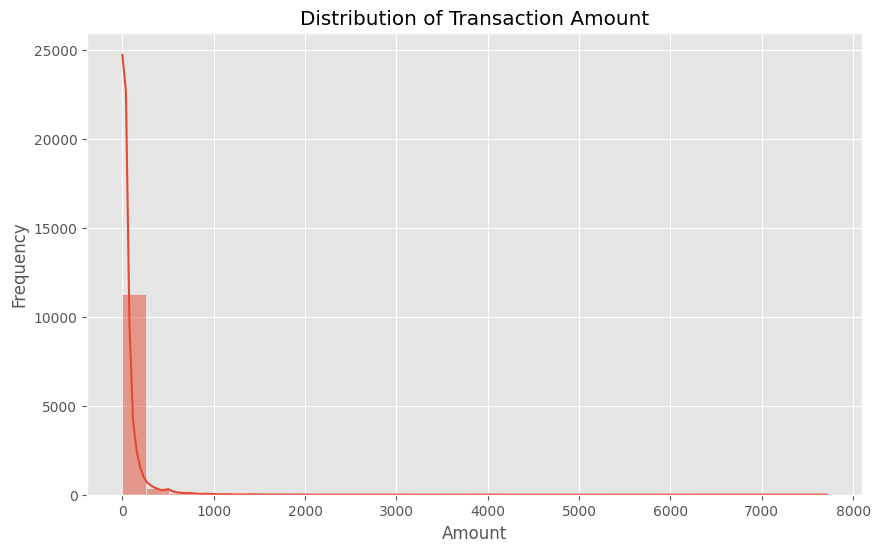

In [ ]:
# Visual exploration
# Distribution of 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

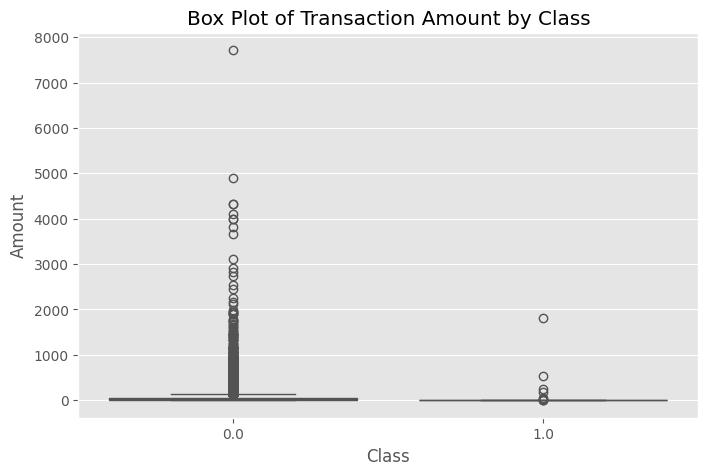

In [ ]:
# Box plot for 'Amount' column
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Box Plot of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()


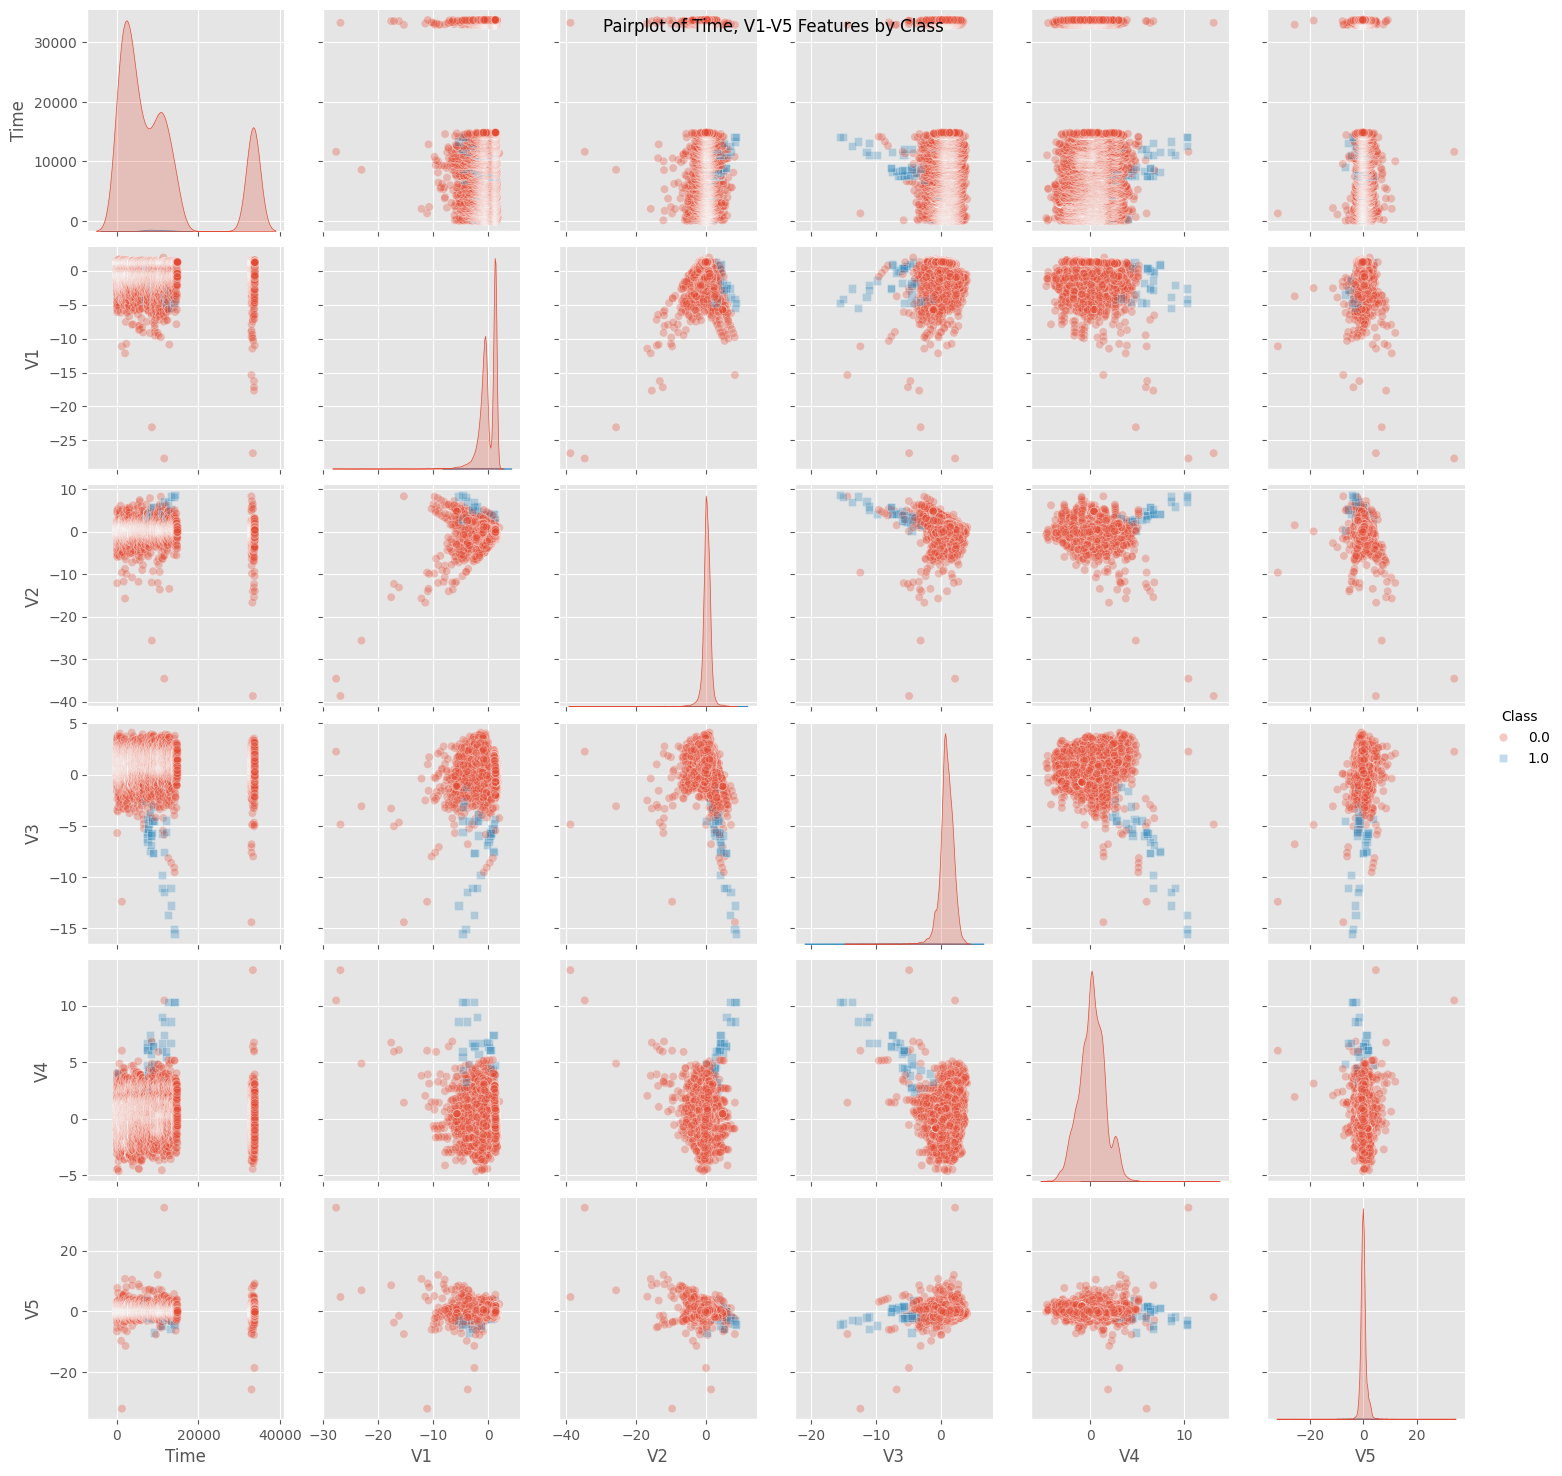

In [ ]:
# Pairplot of some selected features
sns.pairplot(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Class']], hue='Class', markers=['o', 's'], plot_kws={'alpha':0.3})
plt.suptitle('Pairplot of Time, V1-V5 Features by Class')
plt.show()

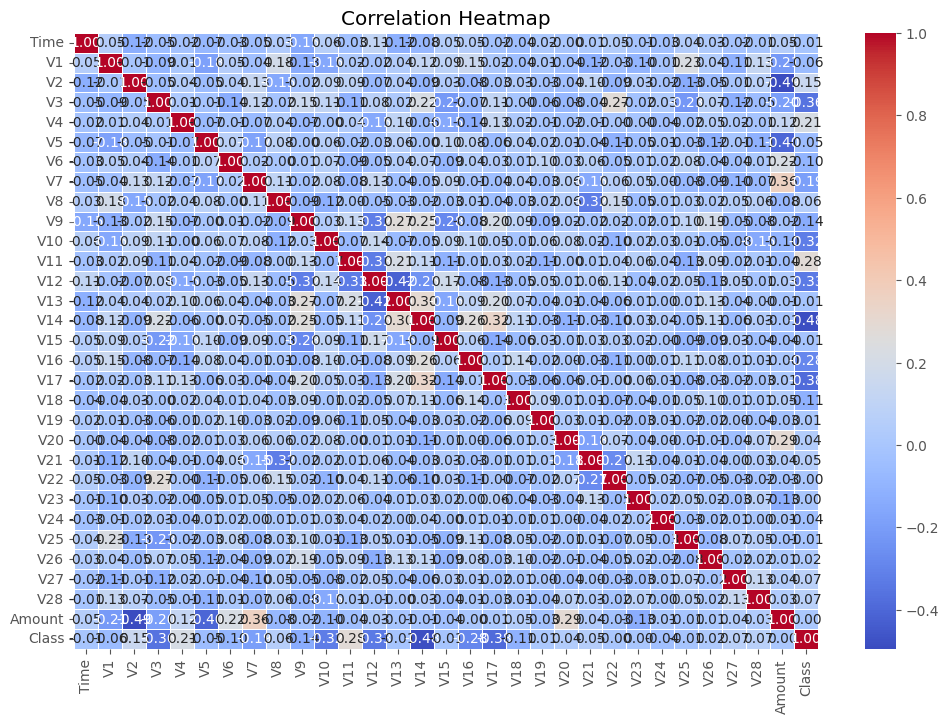

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

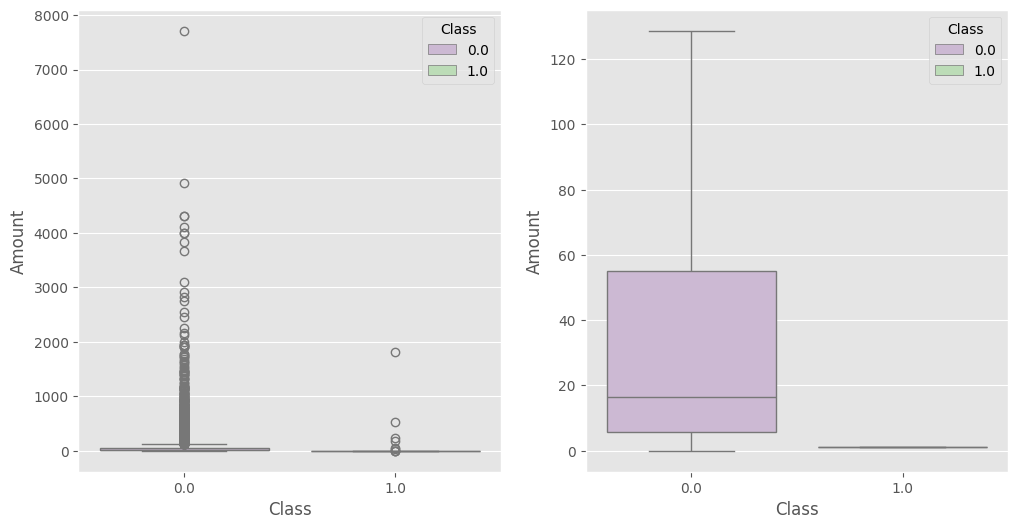

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [ ]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    11904.000000
mean        68.742451
std        205.742771
min          0.000000
25%          5.840000
50%         16.340000
75%         55.082500
max       7712.430000
Name: Amount, dtype: float64

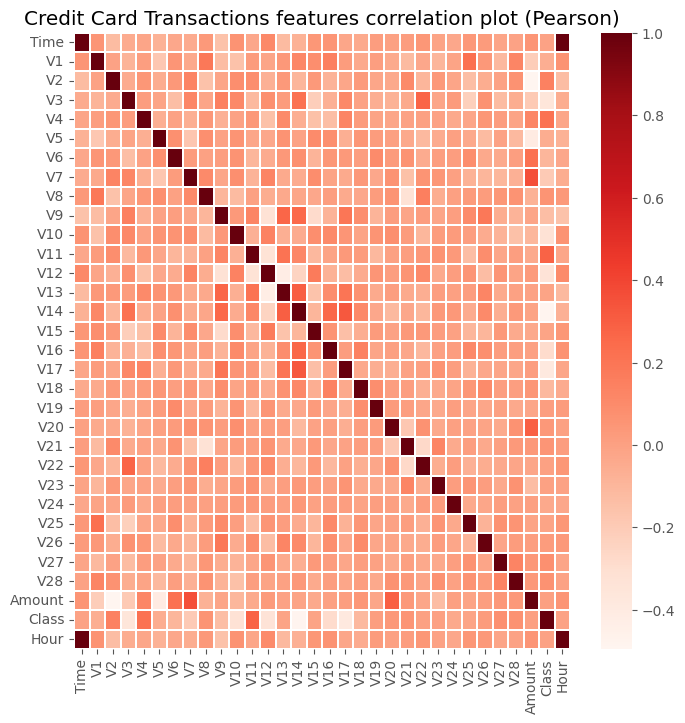

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()


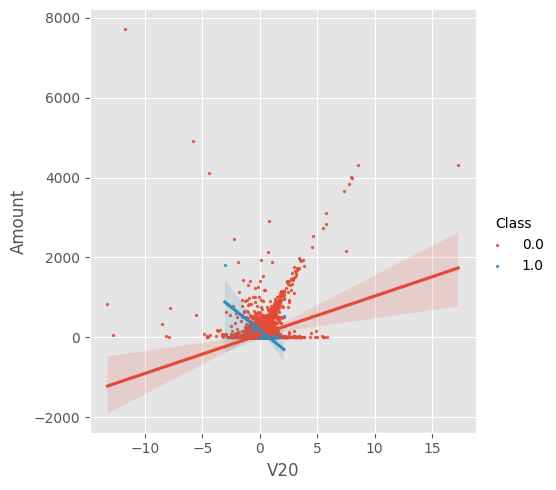

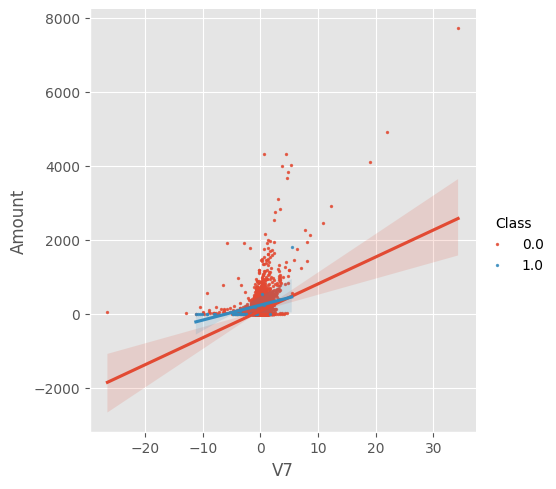

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

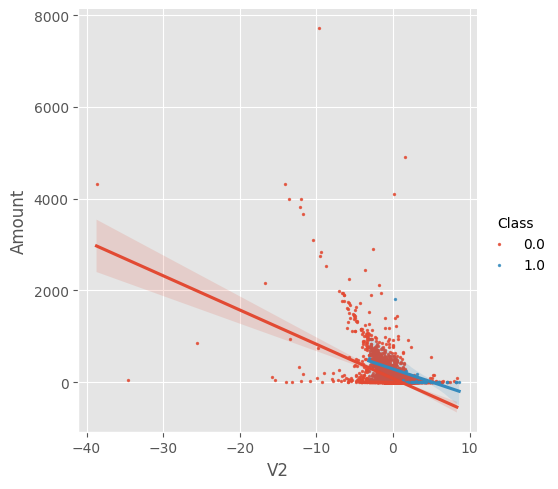

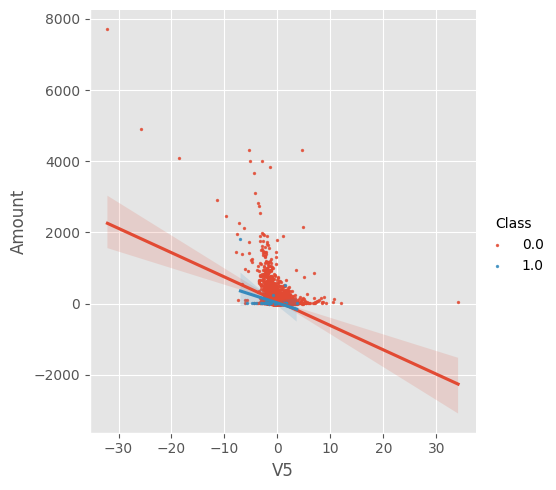

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

0.0    11904
1.0    11904
Name: Class, dtype: int64


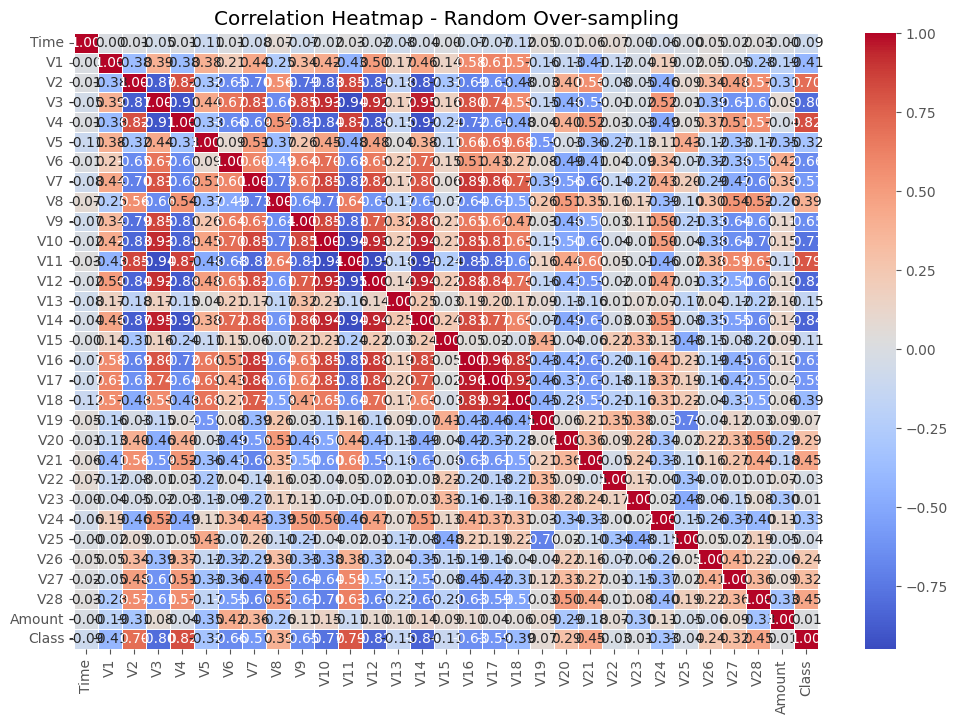

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'credit_card_transactions.csv'
df = pd.read_csv('/content/creditcard.csv')

# Separate majority and minority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Upsample minority class
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled['Class'].value_counts())

# Correlation heatmap for upsampled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_upsampled.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Random Over-sampling')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11945 entries, 0 to 11944
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11945 non-null  int64  
 1   V1      11945 non-null  float64
 2   V2      11945 non-null  float64
 3   V3      11944 non-null  float64
 4   V4      11944 non-null  float64
 5   V5      11944 non-null  float64
 6   V6      11944 non-null  float64
 7   V7      11944 non-null  float64
 8   V8      11944 non-null  float64
 9   V9      11944 non-null  float64
 10  V10     11944 non-null  float64
 11  V11     11944 non-null  float64
 12  V12     11944 non-null  float64
 13  V13     11944 non-null  float64
 14  V14     11944 non-null  float64
 15  V15     11944 non-null  float64
 16  V16     11944 non-null  float64
 17  V17     11944 non-null  float64
 18  V18     11944 non-null  float64
 19  V19     11944 non-null  float64
 20  V20     11943 non-null  float64
 21  V21     11943 non-null  float64
 22

In [ ]:
# data shpae
df.shape

(11945, 31)

In [ ]:
# Lets see the column name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

0.0    11904
1.0       38
Name: Class, dtype: int64

In [ ]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [ ]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.0
mean,10487.934980,-0.206971,0.186146,0.891440,0.199203,-0.078981,0.124813,-0.062658,-0.047718,0.636333,-0.144224,0.660504,-1.007659,0.678417,0.604560,-0.062687,0.016467,0.290744,-0.054370,-0.049568,0.031698,-0.045021,-0.138702,-0.037183,0.016298,0.097574,0.085414,0.005369,0.000571,68.742451,0.0
std,11003.342003,1.572784,1.380474,1.053805,1.389086,1.216562,1.294044,1.045185,1.190249,1.179198,1.007379,1.099445,1.417575,1.226664,1.018336,0.972607,0.820114,0.784787,0.803284,0.806973,0.635786,0.861410,0.627153,0.522634,0.595944,0.426028,0.550961,0.397820,0.291737,205.742771,0.0
min,0.000000,-27.670569,-38.694338,-14.389184,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-3.336805,-6.042641,-2.903100,-4.761175,-3.389510,-6.576789,-4.152532,-4.166708,-5.400014,-3.890140,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-3.083184,-1.338556,-7.976100,-8.424041,0.000000,0.0
25%,2525.500000,-0.983712,-0.297816,0.369622,-0.686642,-0.680091,-0.627456,-0.546458,-0.179139,-0.163599,-0.638913,-0.135891,-2.223264,-0.208429,-0.039149,-0.647433,-0.485414,-0.223709,-0.506406,-0.539855,-0.150209,-0.258409,-0.533648,-0.173839,-0.325311,-0.150765,-0.335928,-0.080536,-0.014333,5.840000,0.0
50%,6603.000000,-0.337405,0.218351,0.899954,0.196335,-0.173142,-0.154754,-0.058698,0.019412,0.635949,-0.273928,0.661749,-1.078321,0.695469,0.589275,0.066286,0.071804,0.240988,-0.014605,-0.047855,-0.018992,-0.105948,-0.124048,-0.048028,0.073802,0.134685,0.016000,-0.001029,0.016636,16.340000,0.0
75%,12353.250000,1.158642,0.848771,1.558953,1.076881,0.352351,0.484016,0.464927,0.275558,1.405367,0.257469,1.460627,0.255448,1.609785,1.414065,0.600832,0.566894,0.724336,0.440623,0.465358,0.157360,0.049186,0.258058,0.081472,0.406371,0.367656,0.420128,0.105294,0.075379,55.082500,0.0
max,33787.000000,1.960497,8.336999,4.101716,13.143668,34.099309,21.393069,34.303177,8.218160,10.392889,12.259949,4.729480,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,17.281859,22.588989,4.534454,13.876221,4.014444,5.525093,3.517346,8.254376,4.860769,7712.430000,0.0


In [ ]:
legit.Amount.describe()

count    11904.000000
mean        68.742451
std        205.742771
min          0.000000
25%          5.840000
50%         16.340000
75%         55.082500
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,-6.319996,6.389743,-9.955713,0.399640,-9.686695,-0.265487,-4.447208,-6.054725,-1.684315,0.126903,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526,1.0
std,3075.746620,2.037031,2.290094,3.833601,2.306530,2.249246,1.291813,3.688865,1.681107,2.131853,3.578781,3.023278,4.171434,0.640716,4.704771,0.958938,3.846491,6.226349,2.699938,1.566252,0.834457,0.715847,0.375699,0.648881,0.533877,1.206054,0.339399,1.054632,0.409671,304.521215,0.0
min,406.000000,-5.454362,-3.157307,-15.496222,2.288644,-6.974522,-3.353060,-11.199975,-3.277535,-6.329801,-13.193415,-0.414575,-17.769143,-0.797484,-19.214325,-2.086989,-12.227189,-18.587366,-6.920762,-2.721853,-3.042626,-1.052368,-0.932391,-2.119007,-1.632653,-2.032068,-0.657488,-3.036271,-0.900452,0.000000,1.0
25%,7625.500000,-3.385216,2.526633,-7.597749,4.000350,-2.185779,-2.946425,-4.657357,0.191773,-3.414888,-7.271254,4.659499,-11.071219,-0.044889,-11.388670,-0.880203,-7.212830,-10.168008,-4.173457,-1.324141,0.220546,0.371638,-0.515118,-0.531803,-0.749061,-0.685538,0.305088,0.268092,0.147212,1.000000,1.0
50%,8571.000000,-1.994623,3.676272,-5.693843,5.814846,-1.623104,-2.380593,-3.463378,0.913864,-2.208768,-5.551150,5.990302,-8.772283,0.360155,-9.117579,-0.399847,-3.051772,-4.832718,-1.143276,0.295839,0.461871,0.581784,-0.079504,0.022722,-0.282829,0.051512,0.389987,0.573570,0.355366,1.000000,1.0
75%,11504.500000,0.315993,4.766769,-4.469978,6.686396,0.730304,-1.712950,-1.530306,1.759753,-0.732665,-4.252906,7.316788,-7.380315,0.726512,-6.646885,0.468893,-2.020650,-1.999787,0.237939,1.251986,0.621468,0.752868,0.145867,0.537283,0.039585,1.168094,0.523151,0.893831,0.681292,1.000000,1.0
max,14152.000000,1.234235,8.636214,1.088463,10.343228,3.624201,3.628382,5.431271,5.060381,2.820829,1.015113,12.018913,-0.503141,1.733917,-1.470102,2.000635,2.581851,6.739384,3.042493,3.166999,2.102339,2.002883,0.435477,1.375966,0.479496,1.701796,0.690806,2.119749,1.108933,1809.680000,1.0


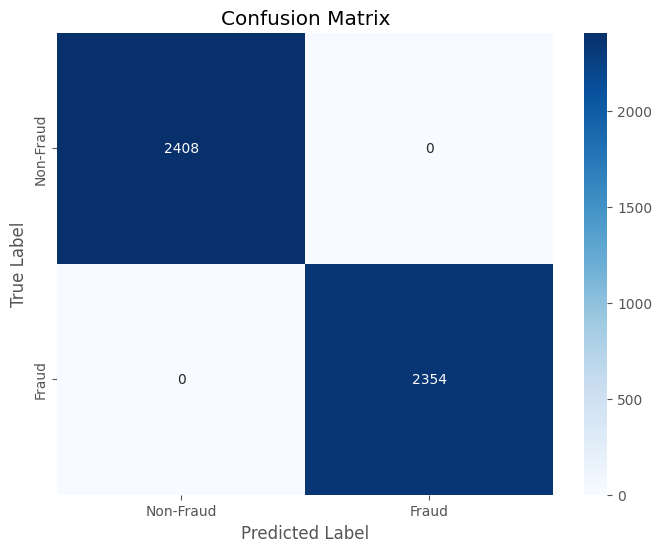

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_upsampled is your upsampled DataFrame
# X_upsampled should contain the features, and y_upsampled should contain the target variable (Class)
X_upsampled = df_upsampled.drop('Class', axis=1)
y_upsampled = df_upsampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Train a classification model (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()